In [2]:
print("Multimedia Security Experiment 11")

Multimedia Security Experiment 11


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import myipf # 前面的实验编写的函数
from matplotlib.gridspec import GridSpec
from bitarray import bitarray
#from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
plt.rcParams["font.sans-serif"] = ["SimHei"] # 用来正常显示中文
plt.rcParams["axes.unicode_minus"] = False # 用来正常显示负号
%config InlineBackend.figure_format = "svg"

In [5]:
img = plt.imread("standard_test_images/lena_gray_256.tif")

## 随机低4位信息隐藏
默认分块大小2×2，可自定义大小以增加鲁棒性，随机选择低4位中的一位隐藏信息，随机数生成器采用BBS，随机数种子需要严格保密，BBS循环两次，生成区间\[0, 3\]中的数，以达到随机选择比特位的目的。  

对图像加0.05的椒盐噪声可以正常识别，加0.1的椒盐噪声需要增加分块大小为3×3才能完整识别出来。  
分块越大，容量越小，质量，鲁棒性越强，如下表，以256×256的灰度图和本次实验为例  

分块尺寸|容量(C/F)|质量(PSNR)|鲁棒性
-|-|-|-
2×2|0.031|47.356|0.1的椒盐噪声产生误码
3×3|0.014|43.783|0.3的椒盐噪声产生误码
4×4|0.008|41.217|0.4的椒盐噪声产生误码

In [47]:
info = "A boat across the end of the world and into the unknown sea, the bow hung side although it is still tormented Weathered incomparably beautiful banner, banner waving his words Yunlong generally beyond the limits of sparkling"
t_img = insertMark(img, info, 17, (4, 4))
n_img = myipf.pepperNoise(t_img, 0.39)

In [48]:
getMark(n_img, 17, (4, 4))

'A boat across the end of the world\x00and into the unknown sea, the bow hung ride although it is still tormentdd Weathered incomparably beautiful baNner, banner waving his words Yunlong generally beyond the limits of sparkling'

均方差： 4.9135284423828125
峰值信噪比： 41.216868865215574


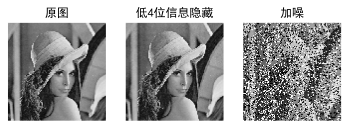

In [49]:
plt.subplot(1, 3, 1), plt.imshow(img, cmap="gray"), plt.axis("off"), plt.title("原图")
plt.subplot(1, 3, 2), plt.imshow(t_img, cmap="gray"), plt.axis("off"), plt.title("低4位信息隐藏")
plt.subplot(1, 3, 3), plt.imshow(n_img, cmap="gray"), plt.axis("off"), plt.title("加噪")
myipf.calcMSEPSNR(t_img, img)